In [1]:
#Dataset provided by and downloaded from: https://www.kaggle.com/datasets/narayan63/netflix-popular-movies-dataset
#Conda venv uses python 3.11.0
#Install and import libraries, I use the anaconda virutal environment so used %conda instead of %pip
%conda install pandas
%conda install numpy
%conda install matplotlib
%conda install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Install and Import success!")

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Install and Import success!


In [2]:
#Read in the downloaded csv and view some basic information about the dataset
df = pd.read_csv('netflix_movies.csv')
print("Shape of dataset",df.shape)
df.info()

Shape of dataset (9957, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


In [3]:
#Sort data by highest rating
df.sort_values('rating', ascending = False)

,title,year,certificate,duration,genre,rating,description,stars,votes
9444,BoJack Horseman,(2014–2020),TV-MA,26 min,"Animation, Comedy, Drama",9.9,BoJack reconnects with faces from his past.,"['Amy Winfrey', '| ', ' Stars:', 'Will Arne...","16,066"
9578,Stranger Things,(2016– ),TV-14,98 min,"Drama, Fantasy, Horror",9.6,"As Hopper braces to battle a monster, Dustin d...","['Matt Duffer, ', 'Ross Duffer', '| ', ' St...","36,276"
8161,Avatar: The Last Airbender,(2005–2008),TV-Y7,25 min,"Animation, Action, Adventure",9.6,The heroes work together to stop Azula's destr...,"['Michael Dante DiMartino', '| ', ' Stars:'...","5,221"
17,1899,(2022– ),NaN,60 min,"Drama, History, Horror",9.6,Multinational immigrants traveling from the ol...,"['Ben Ashenden, ', 'Aneurin Barnard, ', 'Emily...",853
8259,Dexter,(2006–2013),TV-MA,56 min,"Crime, Drama, Mystery",9.6,"In the Season One finale, Dexter follows the c...","['Michael Cuesta', '| ', ' Stars:', 'Michae...","10,604"
...,...,...,...,...,...,...,...,...,...
9752,Hey Duggee,(2014– ),TV-Y,8 min,"Animation, Comedy, Family",NaN,Duggee and the Squirrels bake a pie and learn ...,['Adam Longworth'],NaN
9802,Hey Duggee,(2014– ),TV-Y,8 min,"Animation, Comedy, Family",NaN,Duggee arranges for the Squirrels to write to ...,"['Adam Longworth, ', 'Lily-Summer Williams']",NaN
9813,Oni: Thunder God's Tale,(2022– ),TV-Y7,NaN,"Animation, Action, Adventure",NaN,Add a Plot,"[""Daisuke 'Dice' Tsutsumi"", '| ', ' Stars:'...",NaN
9842,Hollywood Insider,(2018– ),NaN,NaN,Talk-Show,NaN,Behind the scenes of The Irishman.,"['Bobby Cannavale, ', 'Robert De Niro, ', 'Al ...",NaN


In [4]:
#Define variable for missing or NaN data
missing_data = df.isnull()
missing_data.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [5]:
#Calculate how many missing values are in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

title
False    9957
Name: title, dtype: int64

year
False    9430
True      527
Name: year, dtype: int64

certificate
False    6504
True     3453
Name: certificate, dtype: int64

duration
False    7921
True     2036
Name: duration, dtype: int64

genre
False    9884
True       73
Name: genre, dtype: int64

rating
False    8784
True     1173
Name: rating, dtype: int64

description
False    9957
Name: description, dtype: int64

stars
False    9957
Name: stars, dtype: int64

votes
False    8784
True     1173
Name: votes, dtype: int64



In [6]:
#Drop whole row with NaN in "votes" and "rating" column as these are the primary basis for analysis
df.dropna(subset = ["votes"], axis = 0, inplace = True)
df.dropna(subset = ["rating"], axis = 0, inplace = True)

#Reset index because we dropped rows
df.reset_index(drop=True, inplace=True)

In [7]:
#Check to see the rows were dropped
dropped_data = df.isnull()
dropped_data.head()

for column in dropped_data.columns.values.tolist():
    print(column)
    print (dropped_data[column].value_counts())
    print("")

title
False    8784
Name: title, dtype: int64

year
False    8784
Name: year, dtype: int64

certificate
False    6381
True     2403
Name: certificate, dtype: int64

duration
False    7680
True     1104
Name: duration, dtype: int64

genre
False    8772
True       12
Name: genre, dtype: int64

rating
False    8784
Name: rating, dtype: int64

description
False    8784
Name: description, dtype: int64

stars
False    8784
Name: stars, dtype: int64

votes
False    8784
Name: votes, dtype: int64



In [8]:
#Top 20 highest rated on Netflix
top_20_rating = df.sort_values("rating", ascending = False).head(20)
top_20_rating

,title,year,certificate,duration,genre,rating,description,stars,votes
8278,BoJack Horseman,(2014–2020),TV-MA,26 min,"Animation, Comedy, Drama",9.9,BoJack reconnects with faces from his past.,"['Amy Winfrey', '| ', ' Stars:', 'Will Arne...","16,066"
8410,Stranger Things,(2016– ),TV-14,98 min,"Drama, Fantasy, Horror",9.6,"As Hopper braces to battle a monster, Dustin d...","['Matt Duffer, ', 'Ross Duffer', '| ', ' St...","36,276"
7081,Avatar: The Last Airbender,(2005–2008),TV-Y7,25 min,"Animation, Action, Adventure",9.6,The heroes work together to stop Azula's destr...,"['Michael Dante DiMartino', '| ', ' Stars:'...","5,221"
17,1899,(2022– ),NaN,60 min,"Drama, History, Horror",9.6,Multinational immigrants traveling from the ol...,"['Ben Ashenden, ', 'Aneurin Barnard, ', 'Emily...",853
7179,Dexter,(2006–2013),TV-MA,56 min,"Crime, Drama, Mystery",9.6,"In the Season One finale, Dexter follows the c...","['Michael Cuesta', '| ', ' Stars:', 'Michae...","10,604"
7475,JoJo's Bizarre Adventure,(2012– ),TV-MA,25 min,"Animation, Action, Adventure",9.6,In the aftermath of the battle between Risotto...,"['Shinshû Fuji, ', 'Kellen Goff, ', 'Katsuyuki...","1,442"
7743,Avatar: The Last Airbender,(2005–2008),TV-Y7,24 min,"Animation, Action, Adventure",9.6,As the Fire Nation continues its assault on th...,"['Dave Filoni', '| ', ' Stars:', 'Zach Tyle...","3,953"
6964,Avatar: The Last Airbender,(2005–2008),TV-Y7,25 min,"Animation, Action, Adventure",9.5,As Zuko tries to make it by in exile without h...,"['Lauren MacMullan', '| ', ' Stars:', 'Dant...","5,383"
8279,BoJack Horseman,(2014–2020),TV-MA,27 min,"Animation, Comedy, Drama",9.5,A celebration brings people together.,"['Aaron Long', '| ', ' Stars:', 'Will Arnet...","6,230"
8418,Avatar: The Last Airbender,(2005–2008),TV-Y7,25 min,"Animation, Action, Adventure",9.5,Both Aang and Zuko must learn the history of h...,"['Ethan Spaulding', '| ', ' Stars:', 'Zach ...","4,740"


In [9]:
#Top 20 highest voted on Netflix
top_20_votes = df.sort_values("votes", ascending = False).head(20)
top_20_votes

,title,year,certificate,duration,genre,rating,description,stars,votes
7576,JoJo's Bizarre Adventure,(2012– ),TV-MA,25 min,"Animation, Action, Adventure",9.0,While Bruno stays on the ground to fight again...,"['Bill Butts, ', 'Kellen Goff, ', 'Yûichi Naka...",999
2853,Life After Death with Tyler Henry,(2022– ),TV-MA,45 min,Reality-TV,5.9,"After years of being Hollywood's go-to medium,...","['Theresa Koelewyn, ', 'Tyler Henry, ', 'Lisa ...",998
6289,Mortified Nation,(2013),NaN,84 min,Documentary,7.3,Adults share their most embarrassing teenage w...,"['Michael Mayer', '| ', ' Stars:', 'Jenny B...",997
4727,Santana,(2020),TV-MA,106 min,"Action, Crime, Drama",3.8,"Two cops, two brothers. One is out for justice...","['Maradona Dias Dos Santos, ', 'Chris Roland',...",997
4624,Gie,(2005),Not Rated,147 min,"Biography, Drama",7.6,Soe Hok Gie is an activist who lived in the si...,"['Riri Riza', '| ', ' Stars:', 'Nicholas Sa...",997
7335,Warrior Nun,(2020– ),TV-MA,40 min,"Action, Drama, Fantasy",7.0,"After tasting the good life with JC, Ava crash...","['Jet Wilkinson', '| ', ' Stars:', 'Alba Ba...",997
8384,She-Ra and the Princesses of Power,(2018–2020),TV-Y7,24 min,"Animation, Action, Adventure",7.9,"Glimmer sends Adora, Perfuma, Bow and Huntara ...","['Roy Burdine, ', 'Mandy Clotworthy', '| ', ' ...",996
4055,Goedam,(2020– ),TV-MA,10 min,"Short, Horror, Mystery",5.7,"When night falls on the city, shadows and spir...","['Song Chae-Yoon, ', 'Han Su-ah, ', 'Shim So-Y...",995
4220,Opposites Attract,(2015),NaN,90 min,"Comedy, Romance",5.8,"She's a divorce lawyer, single mother and perp...","['Max Croci', '| ', ' Stars:', 'Luca Argent...",994
7387,JoJo's Bizarre Adventure,(2012– ),TV-MA,25 min,"Animation, Action, Adventure",9.0,"On the island of Sardinia, a boy named Doppio ...","['Griffin Burns, ', 'Shinshû Fuji, ', 'Kellen ...",994


In [10]:
#Votes column not sorting correctly due to commas, so let's remove them
df['votes'] = df['votes'].str.replace(',','')
df.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",9773
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...",15413


In [11]:
#Redo the top 20 by votes variable
top_20_votes = df.sort_values("votes", ascending = False).head(20)
top_20_votes

,title,year,certificate,duration,genre,rating,description,stars,votes
7576,JoJo's Bizarre Adventure,(2012– ),TV-MA,25 min,"Animation, Action, Adventure",9.0,While Bruno stays on the ground to fight again...,"['Bill Butts, ', 'Kellen Goff, ', 'Yûichi Naka...",999
1896,Bad Blood,(2017–2018),TV-MA,47 min,"Crime, Drama",7.5,A dramatization of the life and death of Montr...,"['Kim Coates, ', 'Louis Ferreira, ', 'Sharon T...",9989
1049,Love & Anarchy,(2020– ),TV-MA,30 min,"Comedy, Drama, Romance",7.4,"When Sofie, a career-driven consultant and mar...","['Ida Engvoll, ', 'Björn Mosten, ', 'Gizem Erd...",9989
4170,Amy Schumer: The Leather Special,(2017 TV Special),TV-MA,57 min,Comedy,3.1,"Three minutes into her set, Amy Schumer claims...","['Amy Schumer', '| ', ' Stars:', 'Amy Schum...",9988
2853,Life After Death with Tyler Henry,(2022– ),TV-MA,45 min,Reality-TV,5.9,"After years of being Hollywood's go-to medium,...","['Theresa Koelewyn, ', 'Tyler Henry, ', 'Lisa ...",998
2344,Camp Lazlo!,(2005–2022),TV-Y7,30 min,"Animation, Short, Adventure",6.4,"Bean Scout Lazlo, a fun-loving, free-spirited ...","['Carlos Alazraqui, ', 'Jeff Bennett, ', 'Tom ...",9971
7335,Warrior Nun,(2020– ),TV-MA,40 min,"Action, Drama, Fantasy",7.0,"After tasting the good life with JC, Ava crash...","['Jet Wilkinson', '| ', ' Stars:', 'Alba Ba...",997
6289,Mortified Nation,(2013),NaN,84 min,Documentary,7.3,Adults share their most embarrassing teenage w...,"['Michael Mayer', '| ', ' Stars:', 'Jenny B...",997
4727,Santana,(2020),TV-MA,106 min,"Action, Crime, Drama",3.8,"Two cops, two brothers. One is out for justice...","['Maradona Dias Dos Santos, ', 'Chris Roland',...",997
4624,Gie,(2005),Not Rated,147 min,"Biography, Drama",7.6,Soe Hok Gie is an activist who lived in the si...,"['Riri Riza', '| ', ' Stars:', 'Nicholas Sa...",997


In [12]:
#Need to convert object datatype to integer
#Create a copy first just incase
copy_votes = df['votes']
copy_votes = copy_votes.astype(int)

In [13]:
#Put the copy_votes variable back into the dataframe column "votes"
df['votes'] = copy_votes
df['votes']
df.dtypes

title           object
year            object
certificate     object
duration        object
genre           object
rating         float64
description     object
stars           object
votes            int32
dtype: object

In [14]:
#Redo the top 20 by votes variable
top_20_votes = df.sort_values("votes", ascending = False).head(20)
top_20_votes

,title,year,certificate,duration,genre,rating,description,stars,votes
8748,The Lord of the Rings: The Fellowship of the Ring,(2001),PG-13,178 min,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1844075
20,The Lord of the Rings: The Fellowship of the Ring,(2001),PG-13,178 min,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1844055
8778,Breaking Bad,(2008–2013),TV-MA,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,"['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...",1831359
7,Breaking Bad,(2008–2013),TV-MA,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,"['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...",1831340
56,The Lord of the Rings: The Return of the King,(2003),PG-13,201 min,"Action, Adventure, Drama",9.0,Gandalf and Aragorn lead the World of Men agai...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1819157
75,The Lord of the Rings: The Two Towers,(2002),PG-13,179 min,"Action, Adventure, Drama",8.8,While Frodo and Sam edge closer to Mordor with...,"['Peter Jackson', '| ', ' Stars:', 'Elijah ...",1642708
149,Gladiator,(2000),R,155 min,"Action, Adventure, Drama",8.5,A former Roman General sets out to exact venge...,"['Ridley Scott', '| ', ' Stars:', 'Russell ...",1481531
169,The Departed,(2006),R,151 min,"Crime, Drama, Thriller",8.5,An undercover cop and a mole in the police att...,"['Martin Scorsese', '| ', ' Stars:', 'Leona...",1310171
92,Titanic,(1997),PG-13,194 min,"Drama, Romance",7.9,A seventeen-year-old aristocrat falls in love ...,"['James Cameron', '| ', ' Stars:', 'Leonard...",1158746
8775,Stranger Things,(2016– ),TV-14,51 min,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...","['Millie Bobby Brown, ', 'Finn Wolfhard, ', 'W...",1149902


In [15]:
#Print the top 20 titles by rating and votes
top_20_title_by_rating = top_20_rating['title'].value_counts()
print("Top 20 shows by rating:\n",top_20_title_by_rating, sep='')

top_20_title_by_votes = top_20_votes['title'].value_counts()
print("\n\nTop 20 shows by votes:\n",top_20_title_by_votes, sep='')

Top 20 shows by rating:
Avatar: The Last Airbender    4
JoJo's Bizarre Adventure      3
Dark                          3
BoJack Horseman               2
Stranger Things               2
Breaking Bad                  2
1899                          1
Dexter                        1
Anne with an E                1
Cobra Kai                     1
Name: title, dtype: int64


Top 20 shows by votes:
The Lord of the Rings: The Fellowship of the Ring    2
Breaking Bad                                         2
Stranger Things                                      2
Friends                                              2
The Walking Dead                                     2
The Lord of the Rings: The Return of the King        1
The Lord of the Rings: The Two Towers                1
Gladiator                                            1
The Departed                                         1
Titanic                                              1
Léon: The Professional                               1


In [16]:
#Print the top 20 genres by rating and votes
top_20_genre_by_rating = top_20_rating['genre'].value_counts()
print("Top 20 genres by rating:\n",top_20_genre_by_rating, sep='')

top_20_genre_by_votes = top_20_votes['genre'].value_counts()
print("\n\nTop 20 genres by votes:\n",top_20_genre_by_votes, sep='')

Top 20 genres by rating:
Animation, Action, Adventure    7
Crime, Drama, Mystery           4
Animation, Comedy, Drama        2
Drama, Fantasy, Horror          2
Crime, Drama, Thriller          2
Drama, History, Horror          1
Drama, Family                   1
Action, Comedy, Drama           1
Name: genre, dtype: int64


Top 20 genres by votes:
Action, Adventure, Drama     5
Crime, Drama, Thriller       3
Drama, Fantasy, Horror       2
Action, Crime, Drama         2
Comedy, Romance              2
Drama, Horror, Thriller      2
Drama, Romance               1
Action, Adventure, Sci-Fi    1
Drama, Mystery, Thriller     1
Crime, Drama, Mystery        1
Name: genre, dtype: int64


[Text(0, 0, '9.70'),
 Text(0, 0, '9.50'),
 Text(0, 0, '9.55'),
 Text(0, 0, '9.60'),
 Text(0, 0, '9.60'),
 Text(0, 0, '9.47'),
 Text(0, 0, '9.50'),
 Text(0, 0, '9.50'),
 Text(0, 0, '9.43'),
 Text(0, 0, '9.40')]

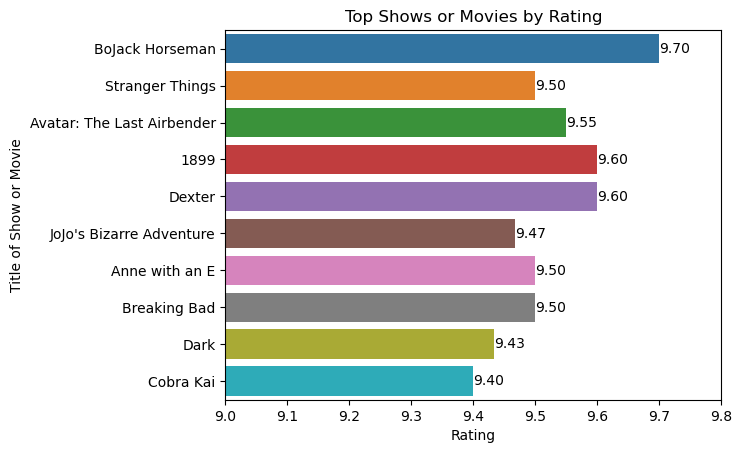

In [17]:
plot = sns.barplot(data = top_20_rating, x = 'rating', y = 'title', errorbar =  None)
plot.set_ylabel('Title of Show or Movie')
plot.set_xlabel('Rating')
plot.set_title('Top Shows or Movies by Rating')
#plt.tick_params(axis='y', labelrotation = 90)
plot.set_xlim(9, 9.8)
plot.bar_label(plot.containers[0], fmt = '{:.2f}')

C:\Users\josep\AppData\Local\Temp\ipykernel_18308\3463997898.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(xlabels)


[Text(0.0, 0, '0K'),
 Text(250000.0, 0, '250K'),
 Text(500000.0, 0, '500K'),
 Text(750000.0, 0, '750K'),
 Text(1000000.0, 0, '1,000K'),
 Text(1250000.0, 0, '1,250K'),
 Text(1500000.0, 0, '1,500K'),
 Text(1750000.0, 0, '1,750K'),
 Text(2000000.0, 0, '2,000K')]

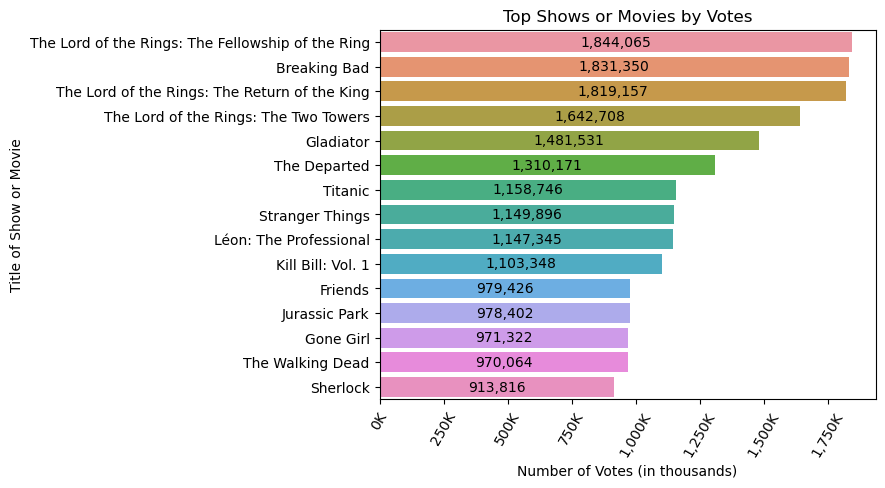

In [18]:
plot = sns.barplot(data = top_20_votes, x = "votes", y = "title", errorbar =  None)
plot.set_ylabel('Title of Show or Movie')
plot.set_xlabel('Number of Votes (in thousands)')
plot.set_title('Top Shows or Movies by Votes')
plt.tick_params(axis='x', labelrotation = 60)
plot.bar_label(plot.containers[0], fmt = '{:,.0f}', label_type = 'center')
plt.ticklabel_format(style ='plain', axis = 'x')
xlabels = ['{:,.0f}'.format(x) + 'K' for x in plot.get_xticks()/1000]
plot.set_xticklabels(xlabels)

In [19]:
#Let's check the longest duration shows or movies
df.sort_values("duration", ascending = False)

,title,year,certificate,duration,genre,rating,description,stars,votes
913,The Vietnam War,(2017),TV-MA,990 min,"Documentary, History, War",9.1,A comprehensive history of the United States' ...,"['Peter Coyote, ', 'Huy Duc, ', 'James Willban...",24632
5853,An Act of War,(2015),Not Rated,99 min,"Crime, Drama, Thriller",5.2,"A veteran tries to put his life back together,...","['Ryan M. Kennedy', '| ', ' Stars:', 'Russ ...",1667
4015,The Seven Deadly Sins: Prisoners of the Sky,(2018),NaN,99 min,"Animation, Action, Fantasy",7.1,The Seven Deadly Sins travel to the Sky Temple...,"['Yasuto Nishikata, ', 'Kino Abe', '| ', ' ...",4863
4007,Bad Day for the Cut,(2017),Not Rated,99 min,"Action, Crime, Drama",6.5,"A middle-aged Irish farmer, who still lives at...","['Chris Baugh', '| ', ' Stars:', ""Nigel O'N...",8260
2900,Perfect Strangers,(I) (2022),TV-14,99 min,"Comedy, Drama",5.8,Follows the story of seven friends who stay to...,"['Wissam Smayra', '| ', ' Stars:', 'Nadine ...",4809
...,...,...,...,...,...,...,...,...,...
8727,Chocolate,(2019–2020),NaN,NaN,"Drama, Romance",8.8,Kang chooses what's most important to him. Cha...,"['Lee Hyeong-min', '| ', ' Stars:', 'Ha Ji-...",12
8737,Vikings,(2013–2020),TV-MA,NaN,"Action, Adventure, Drama",7.5,"After leaving Kattegat, Ivar the Boneless emba...","['Karla Braun', '| ', ' Stars:', 'Alex Høgh...",262
8740,Unstoppable,(2020– ),NaN,NaN,"Comedy, Drama",8.4,A visit to Vera's vacation house brings back p...,"['Diego Martínez Ulanosky', '| ', ' Stars:'...",41
8747,The Upshaws,(2021– ),TV-14,NaN,"Comedy, Family",6.4,"When Tasha gets into an accident, Bernie comes...","['Sheldon Epps', '| ', ' Stars:', 'Mike Epp...",97


In [20]:
#Just like before, need to drop the NaN values
df.dropna(subset = ["duration"], axis = 0, inplace = True)

#Reset index again because we dropped more rows
df.reset_index(drop=True, inplace=True)

In [21]:
#Confirm the NaN values were dropped and the index was reset (should be 7680 rows as previously calculated)
df.sort_values("duration", ascending=False)

,title,year,certificate,duration,genre,rating,description,stars,votes
896,The Vietnam War,(2017),TV-MA,990 min,"Documentary, History, War",9.1,A comprehensive history of the United States' ...,"['Peter Coyote, ', 'Huy Duc, ', 'James Willban...",24632
5397,An Act of War,(2015),Not Rated,99 min,"Crime, Drama, Thriller",5.2,"A veteran tries to put his life back together,...","['Ryan M. Kennedy', '| ', ' Stars:', 'Russ ...",1667
3812,The Seven Deadly Sins: Prisoners of the Sky,(2018),NaN,99 min,"Animation, Action, Fantasy",7.1,The Seven Deadly Sins travel to the Sky Temple...,"['Yasuto Nishikata, ', 'Kino Abe', '| ', ' ...",4863
3807,Bad Day for the Cut,(2017),Not Rated,99 min,"Action, Crime, Drama",6.5,"A middle-aged Irish farmer, who still lives at...","['Chris Baugh', '| ', ' Stars:', ""Nigel O'N...",8260
2802,Perfect Strangers,(I) (2022),TV-14,99 min,"Comedy, Drama",5.8,Follows the story of seven friends who stay to...,"['Wissam Smayra', '| ', ' Stars:', 'Nadine ...",4809
...,...,...,...,...,...,...,...,...,...
6234,Beat Bugs: Happy Birthday to You!,(2017 TV Special),NaN,1 min,"Animation, Short",4.6,They say it's your birthday - and there's no o...,[],6
5497,Santa Clarita Diet: I Love Bodies,(2018 Video),NaN,1 min,"Short, Comedy",8.1,Add a Plot,['Matt T. Sample'],9
5248,Miraculous: Ladybug & Cat Noir: Happy Birthday...,(2017 TV Special),NaN,1 min,"Animation, Short",7.2,"Break dancing, dragons, balloons and a DJ: Lad...",[],68
4220,Piggy Tales,(2014–2018),TV-Y,1 min,"Animation, Adventure, Comedy",6.8,A cartoon series of green cartoon piggies.,"['Antti Pääkkönen, ', 'Antti Pääkkönen, ', 'Do...",147


In [22]:
#Remove the 'min' text from the "duration" column then convert the datatype to allow correct sorting
#But first make a copy
copy_duration = df['duration']
copy_duration = copy_duration.str.replace(' min', '')
copy_duration = copy_duration.astype(int)
copy_duration

0        30
1        58
2        46
3       356
4        24
       ... 
7675     45
7676     44
7677     58
7678     44
7679    356
Name: duration, Length: 7680, dtype: int32

In [23]:
#Put the copy back into the dataframe
df['duration'] = copy_duration
df

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031
1,The Crown,(2016– ),TV-MA,58,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885
2,Better Call Saul,(2015–2022),TV-MA,46,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384
3,Devil in Ohio,(2022),TV-MA,356,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",9773
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...",15413
...,...,...,...,...,...,...,...,...,...
7675,The Imperfects,(2022– ),TV-MA,45,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...",3130
7676,The Walking Dead,(2010–2022),TV-MA,44,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...",970067
7677,The Crown,(2016– ),TV-MA,58,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199898
7678,Supernatural,(2005–2020),TV-14,44,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...",439601


In [24]:
#Check if sorting works correctly for viewing longest duration shows and movies
df.sort_values("duration", ascending = False).head(20)

,title,year,certificate,duration,genre,rating,description,stars,votes
896,The Vietnam War,(2017),TV-MA,990,"Documentary, History, War",9.1,A comprehensive history of the United States' ...,"['Peter Coyote, ', 'Huy Duc, ', 'James Willban...",24632
1980,The Time in Between,(2013–2014),NaN,853,"Adventure, Drama, History",8.3,"The life of Sira, a dressmaker consumed by the...","['Adriana Ugarte, ', 'Mari Carmen Sánchez, ', ...",4258
939,The Staircase,(2004–2018),TV-MA,629,"Documentary, Crime, Drama",7.8,The high-profile murder trial of American nove...,"['Michael Peterson, ', 'David Rudolf, ', 'Ron ...",24588
3333,The Innocence Files,(2020),TV-MA,573,"Documentary, Crime",7.9,Cases of wrongful conviction that the Innocenc...,"['Peter Neufeld, ', 'Barry Scheck, ', 'Michael...",2811
137,The Haunting of Hill House,(2018),TV-MA,572,"Drama, Horror, Mystery",8.6,"Flashing between past and present, a fractured...","['Michiel Huisman, ', 'Carla Gugino, ', 'Henry...",237198
749,Cosmos: A Spacetime Odyssey,(2014),TV-PG,557,Documentary,9.3,An exploration of our discovery of the laws of...,"['Neil deGrasse Tyson, ', 'Christopher Emerson...",121400
217,Maid,(2021),TV-MA,545,Drama,8.4,"After fleeing an abusive relationship, a young...","['Margaret Qualley, ', 'Nick Robinson, ', 'Ryl...",81102
1634,Dogs of Berlin,(2018– ),TV-MA,542,"Action, Crime, Drama",7.5,A politically sensitive murder forces two disp...,"['Felix Kramer, ', 'Fahri Yardim, ', 'Anna Mar...",12808
83,Dahmer - Monster: The Jeffrey Dahmer Story,(2022),TV-MA,534,"Biography, Crime, Drama",8.5,Story of the Milwaukee Monster told from the p...,"['Evan Peters, ', 'Richard Jenkins, ', 'Molly ...",5580
250,The Haunting of Bly Manor,(2020),TV-MA,494,"Drama, Horror, Mystery",7.3,"After an au pair’s tragic death, Henry hires a...","['Victoria Pedretti, ', 'Oliver Jackson-Cohen,...",101853
